# EDA успеваемости студентов

## Задание
Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам. 

#### Подключаем библиотеки и загружаем данные

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np
import warnings
warnings.simplefilter('ignore')

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud_df = pd.read_csv('stud_math.xls')

In [54]:
# Добавим метод чтобы красиво отобржать текст
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))

#### Описание датасета

In [3]:
# Объявим словарь описаний полей, для дальнейшего использования при анализе
descriptions = {
    "school": "аббревиатура школы, в которой учится ученик",
    "sex": "пол ученика ('F' - женский, 'M' - мужской)",
    "age": "возраст ученика (от 15 до 22)",
    "address": "тип адреса ученика ('U' - городской, 'R' - за городом)",
    "famsize": "размер семьи('LE3' <= 3, 'GT3' >3)",
    "Pstatus": "статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)",
    "Medu": "образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)",
    "Fedu": "образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)",
    "Mjob": "работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)",
    "Fjob": "работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)",
    "reason": "причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)",
    "guardian": "опекун ('mother' - мать, 'father' - отец, 'other' - другое)",
    "traveltime": "время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)",
    "studytime": "время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)",
    "failures": "количество внеучебных неудач (n, если 1<=n<=3, иначе 0)",
    "schoolsup": "дополнительная образовательная поддержка (yes или no)",
    "famsup": "семейная образовательная поддержка (yes или no)",
    "paid": "дополнительные платные занятия по математике (yes или no)",
    "activities": "дополнительные внеучебные занятия (yes или no)",
    "nursery": "посещал детский сад (yes или no)",
    "higher": "хочет получить высшее образование (yes или no)",
    "internet": "наличие интернета дома (yes или no)",
    "romantic": "в романтических отношениях (yes или no)",
    "famrel": "семейные отношения (от 1 - очень плохо до 5 - очень хорошо)",
    "freetime": "свободное время после школы (от 1 - очень мало до 5 - очень мого)",
    "goout": "проведение времени с друзьями (от 1 - очень мало до 5 - очень много)",
    "health": "текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)",
    "absences": "количество пропущенных занятий",
    "score": "баллы по госэкзамену по математике"
}

In [4]:
i = 1
for key, value in descriptions.items():
    printmd(str(i) + ". **" + key + "** - " + value)
    i += 1

1. **school** - аббревиатура школы, в которой учится ученик

2. **sex** - пол ученика ('F' - женский, 'M' - мужской)

3. **age** - возраст ученика (от 15 до 22)

4. **address** - тип адреса ученика ('U' - городской, 'R' - за городом)

5. **famsize** - размер семьи('LE3' <= 3, 'GT3' >3)

6. **Pstatus** - статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7. **Medu** - образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8. **Fedu** - образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9. **Mjob** - работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10. **Fjob** - работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11. **reason** - причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12. **guardian** - опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13. **traveltime** - время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14. **studytime** - время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15. **failures** - количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16. **schoolsup** - дополнительная образовательная поддержка (yes или no)

17. **famsup** - семейная образовательная поддержка (yes или no)

18. **paid** - дополнительные платные занятия по математике (yes или no)

19. **activities** - дополнительные внеучебные занятия (yes или no)

20. **nursery** - посещал детский сад (yes или no)

21. **higher** - хочет получить высшее образование (yes или no)

22. **internet** - наличие интернета дома (yes или no)

23. **romantic** - в романтических отношениях (yes или no)

24. **famrel** - семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25. **freetime** - свободное время после школы (от 1 - очень мало до 5 - очень мого)

26. **goout** - проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27. **health** - текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28. **absences** - количество пропущенных занятий

29. **score** - баллы по госэкзамену по математике

## Первичный осмотр данных

In [5]:
display(stud_df.head(5))
stud_df.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Сет содержит 30 стобцов, из которых 13 числовых, и 17 строковых. Кроме столбцов school, sex и age, все остальные содержат пропуски.

В наборе также содержится лишний столбец "studytime, granular", который отсутствует в описании. Удалим его

In [6]:
stud_df.drop(['studytime, granular'], inplace=True, axis=1)

## Первичный анализ данных

У некоторых столбцов есть известные границы значений. Сохраним их в отдельный словарь, чтобы использвать как границы выбросов

In [7]:
outline_bounds = {
    "age": [15, 22],
    "Medu": [0, 4],
    "Fedu": [0, 4],
    "traveltime": [1, 4],
    "studytime": [1, 4],
    "failures": [0, 3],
    "famrel": [1, 5],
    "freetime": [1, 5],
    "goout": [1, 5],
    "health": [1, 5]
}

Так как стобцов много и разбирать каждый отдельно будет слишком долго, напишем методы которые проведут первичный анализ по каждому из столбцов в зависимости от типа и наличия выбросов

In [8]:
def first_analysis(data_frame, column):
    printmd('### ' + str(column))
    printmd(descriptions[column])

    # If oject type - analyze as string
    if np.dtype(data_frame[column]) == np.dtype('O'):
        string_column_analysis(data_frame, column)

    # Else - as number
    else:
        num_column_analysis(data_frame, column)

In [9]:
def string_column_analysis(data_frame, column):
    printmd('Строковый тип')

    # Just show countplot for strings
    fig, ax = plt.subplots(figsize=(7, 4))
    sns.countplot(data_frame[column], ax=ax).set(
        title="Распределение признака")
    plt.show()

In [10]:
def num_column_analysis(data_frame, column):
    printmd('Числовой тип')

    # Print IQR data
    IQR = data_frame[column].quantile(0.75) - data_frame[column].quantile(0.25)
    perc25 = data_frame[column].quantile(0.25)
    perc75 = data_frame[column].quantile(0.75)
    bounds = [perc25 - 1.5*IQR, perc75 + 1.5*IQR]

    if column in outline_bounds:
        bounds = outline_bounds[column]

    print(
        '25-й перцентиль: {},'.format(perc25),
        '75-й перцентиль: {},'.format(perc75),
        "IQR: {}, ".format(IQR),
        "Границы выбросов: [{f}, {l}].".format(f=bounds[0], l=bounds[1]))

    # Print misses percent
    misses = (1 - (data_frame[column].count() / data_frame.shape[0]))
    print('Процент пропусков: ', round(misses*100, 2), "%")

    # Prepare plot data frame
    plot_df = pd.DataFrame({'Распределение': data_frame[column]})

    # Check outliers
    if data_frame[column].min() < bounds[0] or data_frame[column].max() > bounds[1]:

        print('Найдены выбросы:')
        display(data_frame.loc[(~data_frame.loc[:, column].between(
            bounds[0], bounds[1])) & pd.notnull(data_frame.loc[:, column])])

        plot_df['Распределение в границах выбросов'] = data_frame.loc[data_frame.loc[:,
                                                                                     column].between(bounds[0], bounds[1])][column]

    # Draw plot
    fig, ax = plt.subplots(figsize=(7 * plot_df.shape[1], 4))
    plot_df.hist(ax=ax)
    plt.show()

### school

аббревиатура школы, в которой учится ученик

Строковый тип

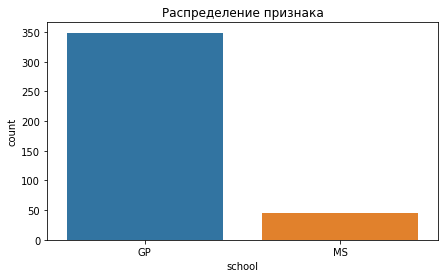

### sex

пол ученика ('F' - женский, 'M' - мужской)

Строковый тип

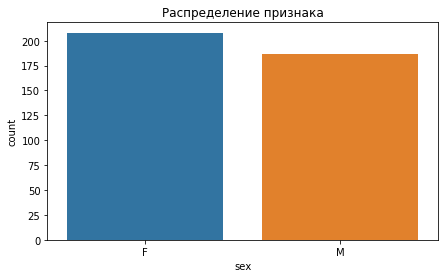

### age

возраст ученика (от 15 до 22)

Числовой тип

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [15, 22].
Процент пропусков:  0.0 %


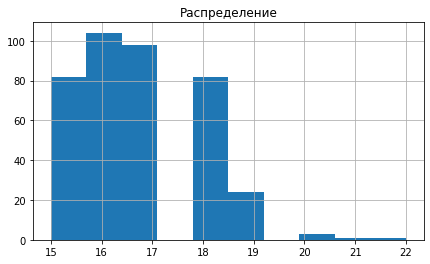

### address

тип адреса ученика ('U' - городской, 'R' - за городом)

Строковый тип

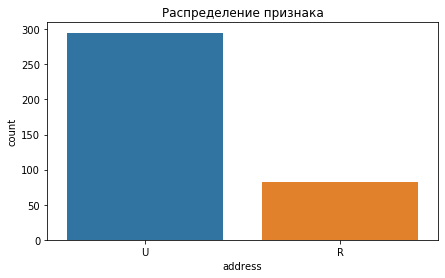

### famsize

размер семьи('LE3' <= 3, 'GT3' >3)

Строковый тип

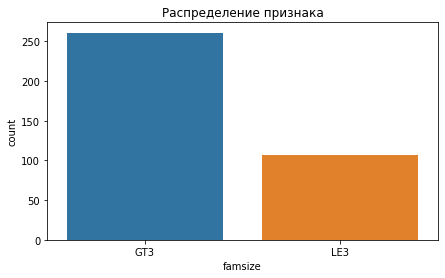

### Pstatus

статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

Строковый тип

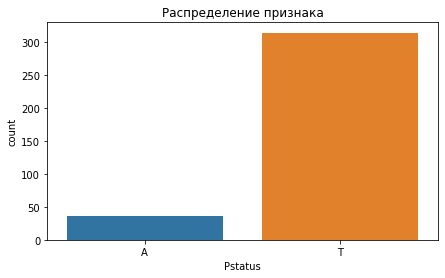

### Medu

образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

Числовой тип

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [0, 4].
Процент пропусков:  0.76 %


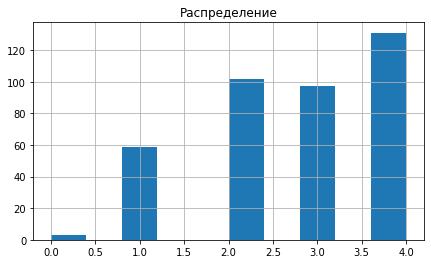

### Fedu

образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

Числовой тип

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0, 4].
Процент пропусков:  6.08 %
Найдены выбросы:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,NaN,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


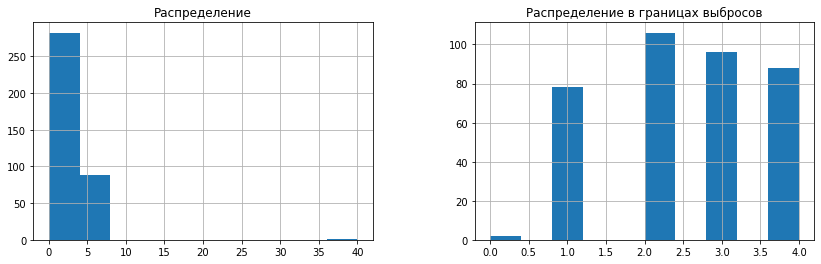

### Mjob

работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

Строковый тип

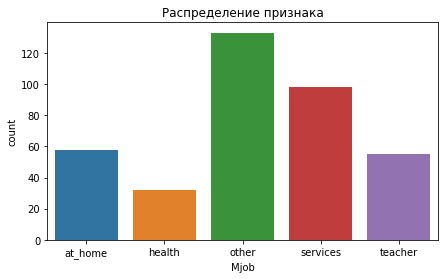

### Fjob

работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

Строковый тип

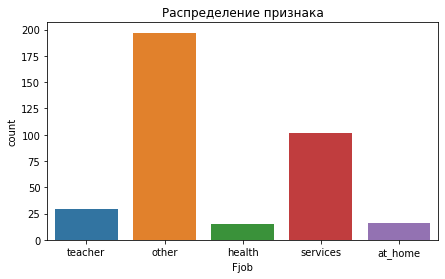

### reason

причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

Строковый тип

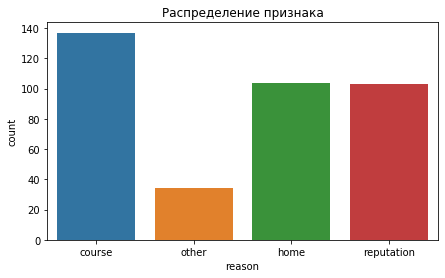

### guardian

опекун ('mother' - мать, 'father' - отец, 'other' - другое)

Строковый тип

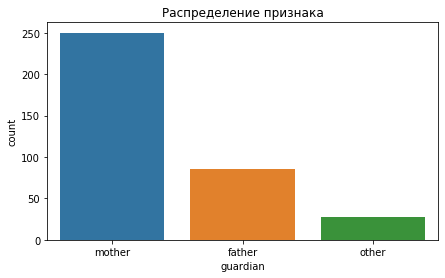

### traveltime

время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

Числовой тип

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [1, 4].
Процент пропусков:  7.09 %


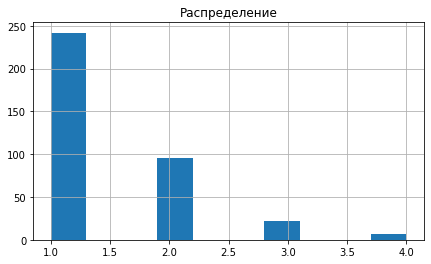

### studytime

время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

Числовой тип

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [1, 4].
Процент пропусков:  1.77 %


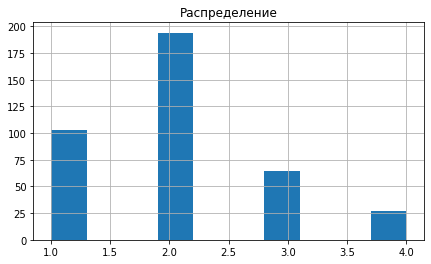

### failures

количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

Числовой тип

25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0,  Границы выбросов: [0, 3].
Процент пропусков:  5.57 %


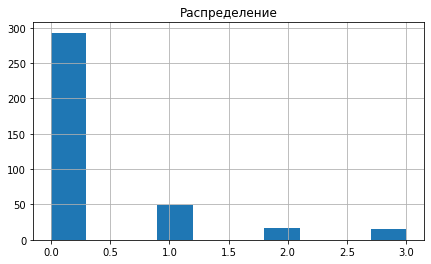

### schoolsup

дополнительная образовательная поддержка (yes или no)

Строковый тип

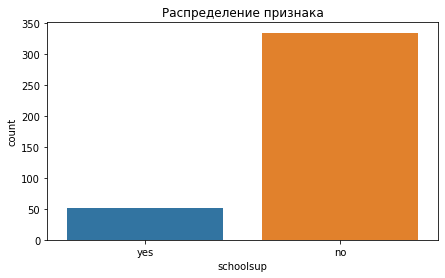

### famsup

семейная образовательная поддержка (yes или no)

Строковый тип

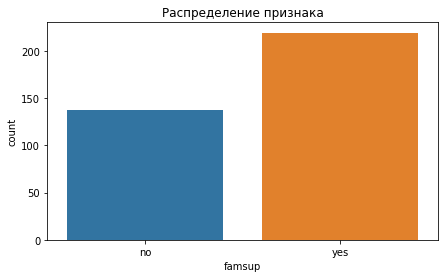

### paid

дополнительные платные занятия по математике (yes или no)

Строковый тип

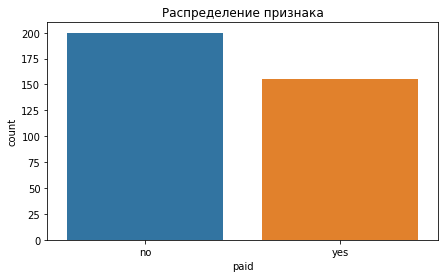

### activities

дополнительные внеучебные занятия (yes или no)

Строковый тип

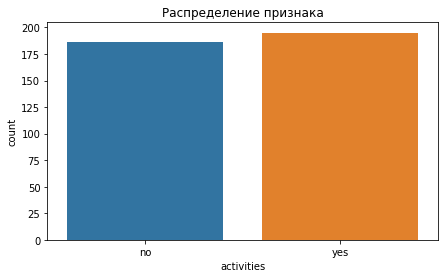

### nursery

посещал детский сад (yes или no)

Строковый тип

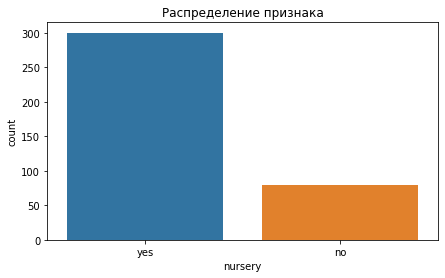

### higher

хочет получить высшее образование (yes или no)

Строковый тип

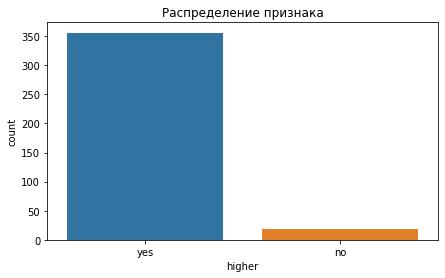

### internet

наличие интернета дома (yes или no)

Строковый тип

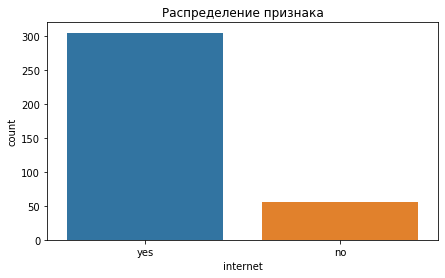

### romantic

в романтических отношениях (yes или no)

Строковый тип

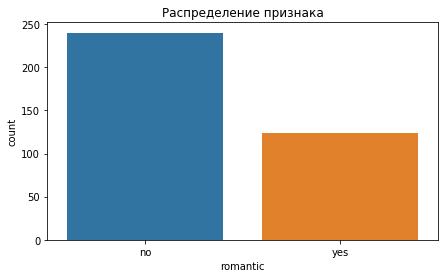

### famrel

семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

Числовой тип

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [1, 5].
Процент пропусков:  6.84 %
Найдены выбросы:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,NaN,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0


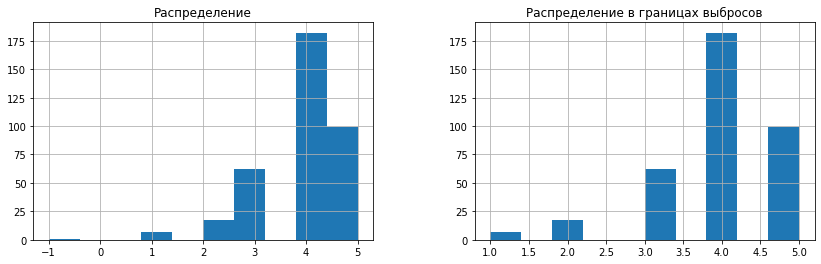

### freetime

свободное время после школы (от 1 - очень мало до 5 - очень мого)

Числовой тип

25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1, 5].
Процент пропусков:  2.78 %


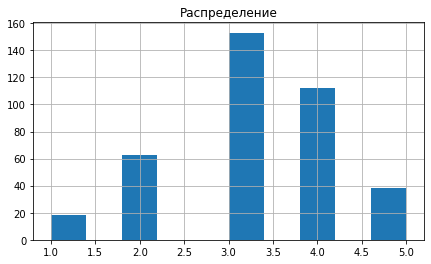

### goout

проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

Числовой тип

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [1, 5].
Процент пропусков:  2.03 %


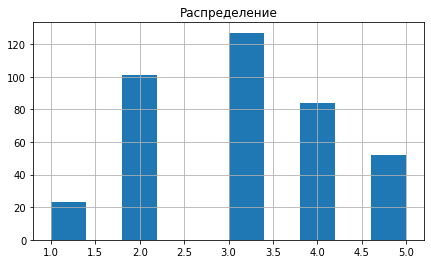

### health

текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

Числовой тип

25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0,  Границы выбросов: [1, 5].
Процент пропусков:  3.8 %


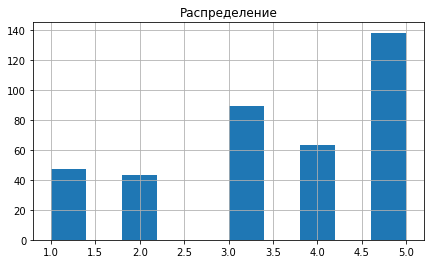

### absences

количество пропущенных занятий

Числовой тип

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].
Процент пропусков:  3.04 %
Найдены выбросы:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
40,GP,F,16,U,LE3,T,2.0,2.0,other,other,home,mother,2.0,2.0,1.0,no,NaN,no,yes,no,yes,yes,yes,3.0,3.0,3.0,3.0,25.0,55.0
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,NaN,3.0,5.0,54.0,55.0
103,GP,F,15,U,GT3,T,3.0,2.0,services,other,home,mother,2.0,2.0,0.0,yes,yes,yes,no,yes,yes,yes,no,4.0,3.0,5.0,2.0,26.0,30.0
183,GP,F,17,U,LE3,NaN,3.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,no,yes,no,yes,yes,yes,yes,yes,5.0,3.0,3.0,1.0,56.0,40.0
198,GP,F,17,U,GT3,NaN,4.0,4.0,services,teacher,home,mother,2.0,1.0,1.0,no,yes,no,no,yes,yes,NaN,no,4.0,2.0,4.0,2.0,24.0,90.0
205,GP,F,17,U,GT3,T,3.0,4.0,at_home,services,home,mother,1.0,3.0,1.0,no,yes,yes,no,yes,yes,yes,yes,4.0,4.0,3.0,5.0,28.0,45.0
216,GP,F,17,U,GT3,T,4.0,3.0,other,NaN,reputation,mother,1.0,2.0,2.0,no,no,yes,no,yes,yes,yes,yes,3.0,4.0,5.0,1.0,22.0,20.0
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
260,GP,F,18,U,GT3,NaN,4.0,3.0,NaN,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,yes,3.0,1.0,2.0,2.0,21.0,90.0
276,GP,F,18,R,GT3,A,3.0,2.0,other,services,home,mother,2.0,2.0,0.0,no,NaN,no,no,no,no,yes,yes,NaN,1.0,1.0,5.0,75.0,45.0


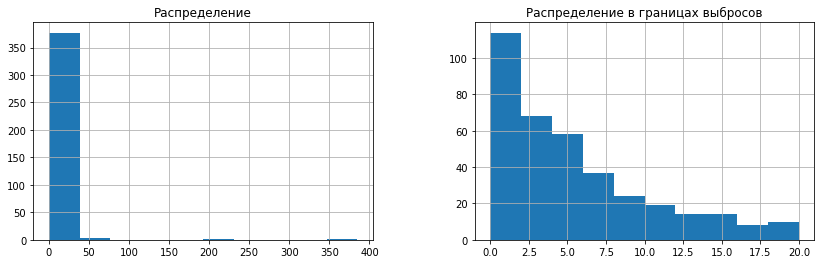

### score

баллы по госэкзамену по математике

Числовой тип

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].
Процент пропусков:  1.52 %


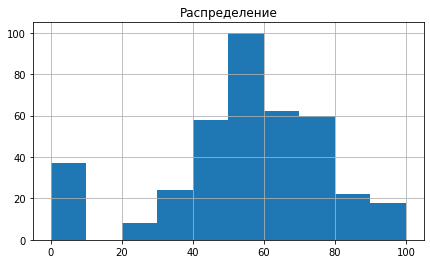

In [11]:
# Отобразим первичный анализ всего набора данных
for c in stud_df.columns:
    first_analysis(stud_df, c)

### Очистка данных
В целом данные хорошего качества, но есть несколько аномалий. Разберемся с ними

В колонке **Fedu** видим один выброс со значением 40, когда границы в пределах от 0 до 4. Скорее всего это опечатка, заменим ее на 4.

In [12]:
stud_df.Fedu = stud_df.Fedu.apply(lambda x: 4 if x == 40 else x)

Результат

### Fedu

образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

Числовой тип

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0, 4].
Процент пропусков:  6.08 %


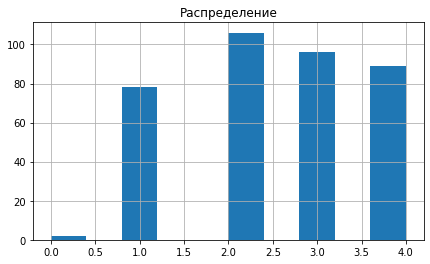

In [13]:
first_analysis(stud_df, "Fedu")

Аналогичная ситуация в колонке **famrel**, поступим так же

### famrel

семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

Числовой тип

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [1, 5].
Процент пропусков:  6.84 %


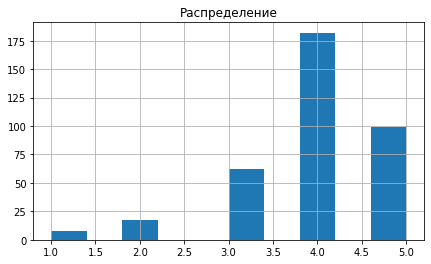

In [14]:
stud_df.famrel = stud_df.famrel.apply(lambda x: x*-1 if x < 0 else x)
first_analysis(stud_df, "famrel")

В колонке **absences** видим что часть верных данных попала за границы выбросов, но есть и значения явно неверные - 385 и 212. С точки зрения здравого смысла, они не попадают в возможные пределы. Поэтому определим границы вручную, и удалим записи со значением больше 100.

### absences

количество пропущенных занятий

Числовой тип

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [0, 100].
Процент пропусков:  3.54 %


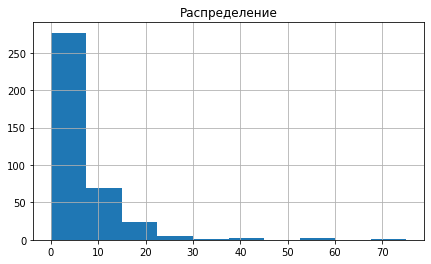

In [15]:
outline_bounds["absences"] = [0, 100]
stud_df.absences = stud_df.absences.apply(lambda x: None if x > 100 else x)
first_analysis(stud_df, "absences")

## Корреляционный анализ
Построим матрицу коррелляций по всем столбцам

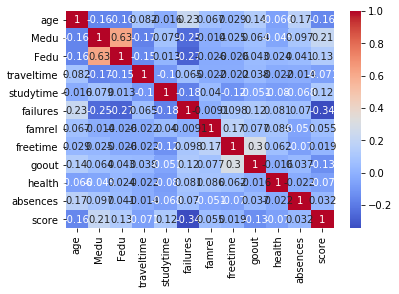

In [16]:
sns.heatmap(stud_df.corr(), annot=True, cmap='coolwarm')

In [17]:
stud_df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.163670,0.081508,-0.015556,0.228047,0.067415,0.029023,0.135107,-0.065946,0.166773,-0.155726
Medu,-0.161704,1.000000,0.625516,-0.173515,0.078589,-0.245463,-0.014459,0.025335,0.064164,-0.045051,0.097295,0.213349
Fedu,-0.163670,0.625516,1.000000,-0.145349,0.012896,-0.272882,-0.026122,-0.025892,0.042663,0.023862,0.040514,0.130923
traveltime,0.081508,-0.173515,-0.145349,1.000000,-0.102206,0.064699,-0.021542,-0.021937,0.037636,-0.021531,-0.014040,-0.070559
studytime,-0.015556,0.078589,0.012896,-0.102206,1.000000,-0.178992,0.039555,-0.121969,-0.051280,-0.080016,-0.067734,0.115741
failures,0.228047,-0.245463,-0.272882,0.064699,-0.178992,1.000000,-0.009110,0.098382,0.120914,0.081284,0.069703,-0.344338
famrel,0.067415,-0.014459,-0.026122,-0.021542,0.039555,-0.009110,1.000000,0.172751,0.077167,0.086309,-0.051402,0.055305
freetime,0.029023,0.025335,-0.025892,-0.021937,-0.121969,0.098382,0.172751,1.000000,0.296437,0.061575,-0.070416,0.019026
goout,0.135107,0.064164,0.042663,0.037636,-0.051280,0.120914,0.077167,0.296437,1.000000,-0.015608,0.036836,-0.129685
health,-0.065946,-0.045051,0.023862,-0.021531,-0.080016,0.081284,0.086309,0.061575,-0.015608,1.000000,-0.021752,-0.070460


Из этих данных сложно сделать какие-то выводы, поэтому лучше посмторим с чем кореллирует столбец **score**

In [18]:
# Сделаем отдельный датафрейм для кореллирующих значений
score_correlation_df = pd.DataFrame(stud_df.corr()["score"].values,
                                    index=stud_df.corr()["score"].index,
                                    columns=['correlation'])

# Удалим прямую корреляцию
score_correlation_df = score_correlation_df.drop("score")

# Добавим колонку с абсолютным значением, для более удобной приоретизации
score_correlation_df['corellation_amount'] = abs(
    score_correlation_df.correlation)
printmd("#### Кореллирующие значения в порядке убывания")
score_correlation_df.sort_values(by='corellation_amount', ascending=False)

#### Кореллирующие значения в порядке убывания

,correlation,corellation_amount
failures,-0.344338,0.344338
Medu,0.213349,0.213349
age,-0.155726,0.155726
Fedu,0.130923,0.130923
goout,-0.129685,0.129685
studytime,0.115741,0.115741
traveltime,-0.070559,0.070559
health,-0.070460,0.070460
famrel,0.055305,0.055305
absences,0.031698,0.031698


Из этой таблицы можно сделать вывод, что больше всего в обучении мешают проблемы вне учебных заведений, а также юный возраст и активное общение с друзьями. А позитивно на результатах сказывается образование родителей и самостоятельное обучение.
Как ни странно, количество прогулов и свободного времени после занятий не оказывает заметного влияния на результаты экзамена.

В целях очистки датасета, удалим стобцы с процентом корелляции ниже 10, однако для будущей модели, возможно, их тоже можно было бы принять к рассмотрению.

In [19]:
stud_df.drop(
    score_correlation_df[score_correlation_df.corellation_amount < 0.1].index, axis=1, inplace=True)

## Анализ номинативных переменных
Напишем методы, которые определят статистическую значимость стоковых колонок с помощью теста стьюдента, а также покажут графики распределения баллов в зависимости от значения в колонке

In [20]:
# Отсеиваем не строковые значения и выполняем проверки для оставшихся
def nom_analysis(data_frame, column):
    if np.dtype(data_frame[column]) == np.dtype('O'):
        printmd('### ' + str(column))
        printmd(descriptions[column])

        if student_test(data_frame, column):
            printmd('**Найдены статистически значимые различия**')

        get_boxplot(data_frame, column)

In [21]:
def get_boxplot(data_frame, column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=data_frame.loc[data_frame.loc[:, column].isin(
                    data_frame.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks()
    ax.set_title('Респределение баллов по параметру ' + column)
    plt.show()

In [33]:
def student_test(data_frame, column, alpha=0.05):
    cols = data_frame.loc[:, column]
    combinations_all = list(combinations(cols.dropna().unique(), 2))
    for comb in combinations_all:
        if ttest_ind(data_frame.loc[data_frame.loc[:, column] == comb[0], 'score'].dropna(),
                     data_frame.loc[data_frame.loc[:, column] == comb[1], 'score'].dropna()).pvalue \
                <= alpha/len(combinations_all):  # Учли поправку Бонферони
            return True

### school

аббревиатура школы, в которой учится ученик

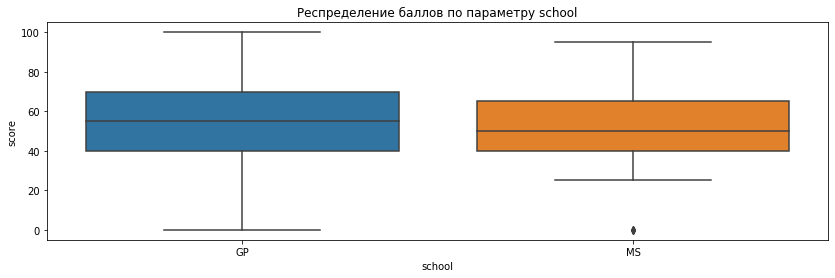

### sex

пол ученика ('F' - женский, 'M' - мужской)

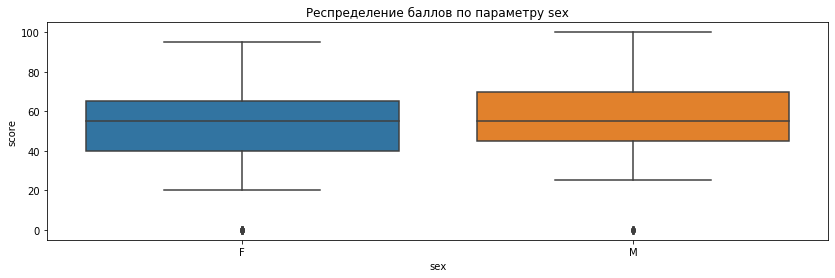

### address

тип адреса ученика ('U' - городской, 'R' - за городом)

**Найдены статистически значимые различия**

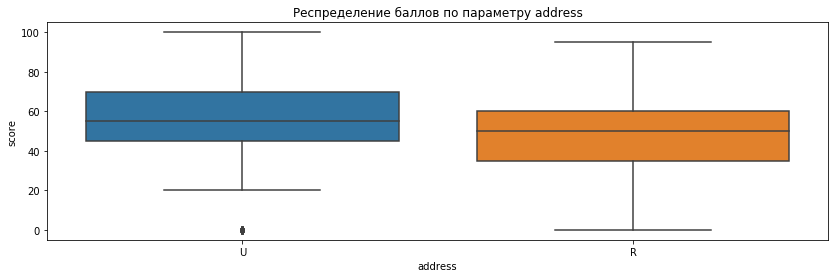

### famsize

размер семьи('LE3' <= 3, 'GT3' >3)

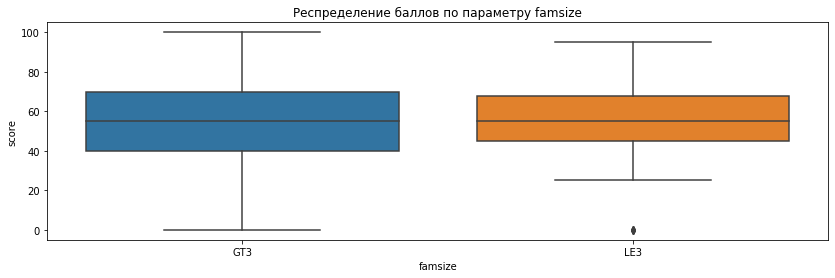

### Pstatus

статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

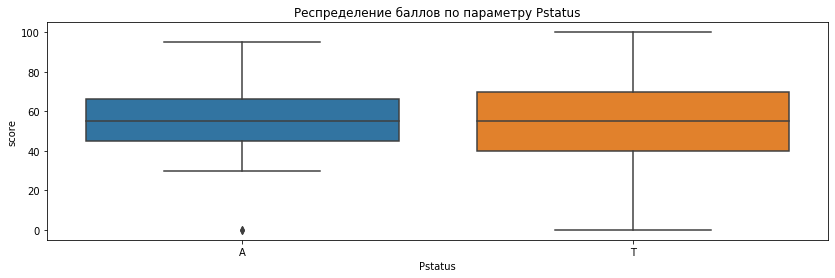

### Mjob

работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

**Найдены статистически значимые различия**

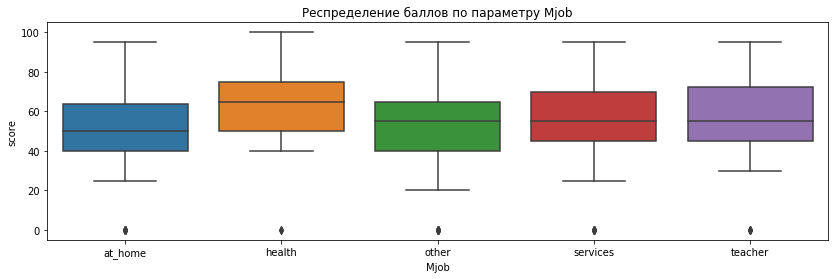

### Fjob

работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

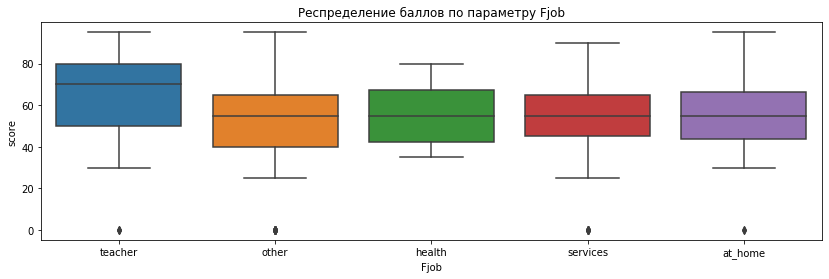

### reason

причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

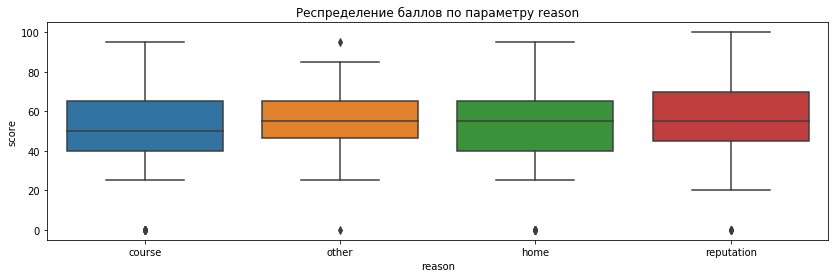

### guardian

опекун ('mother' - мать, 'father' - отец, 'other' - другое)

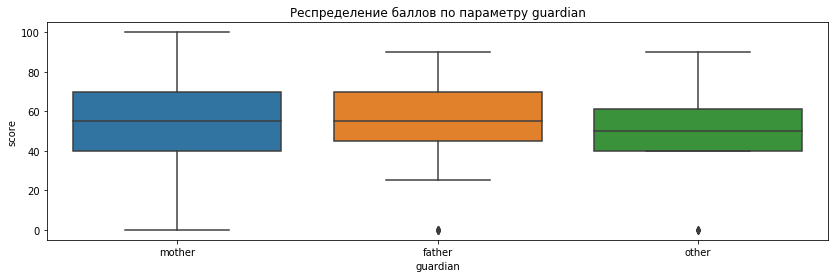

### schoolsup

дополнительная образовательная поддержка (yes или no)

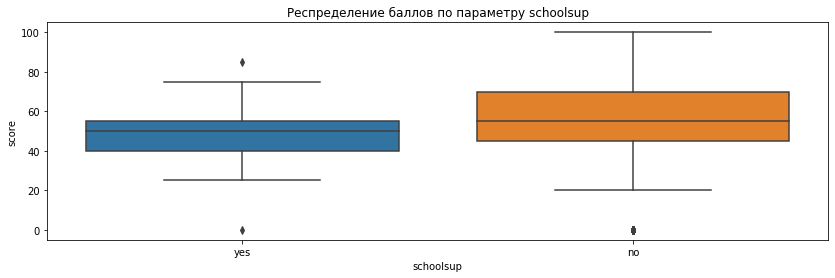

### famsup

семейная образовательная поддержка (yes или no)

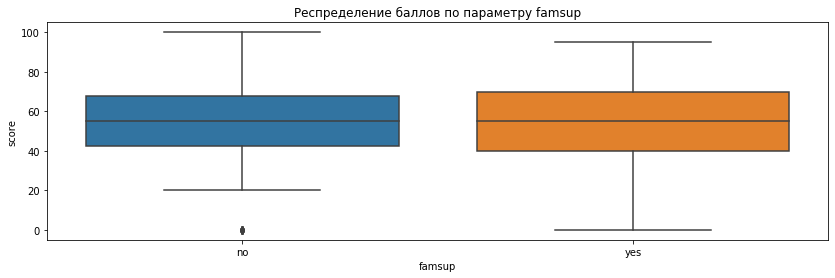

### paid

дополнительные платные занятия по математике (yes или no)

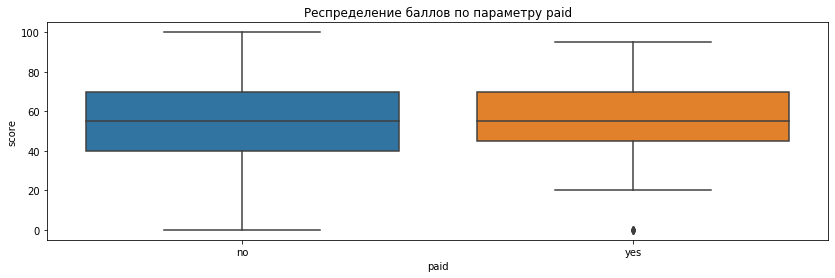

### activities

дополнительные внеучебные занятия (yes или no)

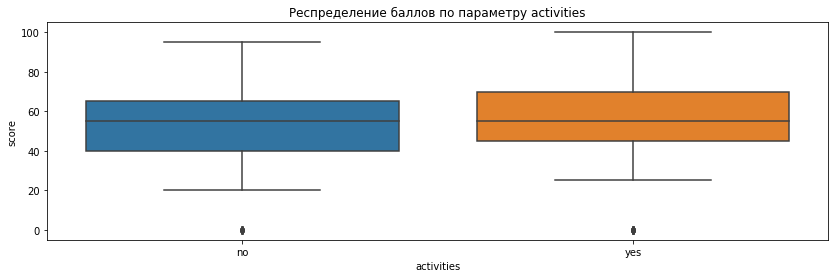

### nursery

посещал детский сад (yes или no)

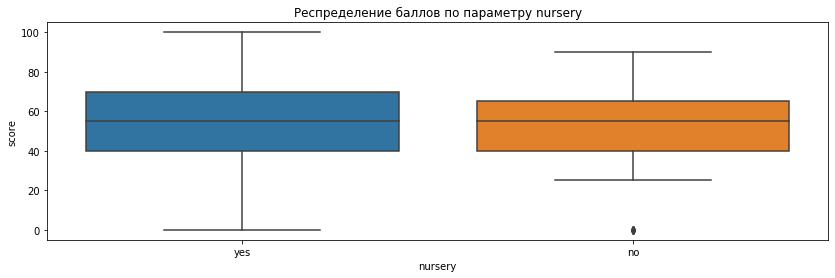

### higher

хочет получить высшее образование (yes или no)

**Найдены статистически значимые различия**

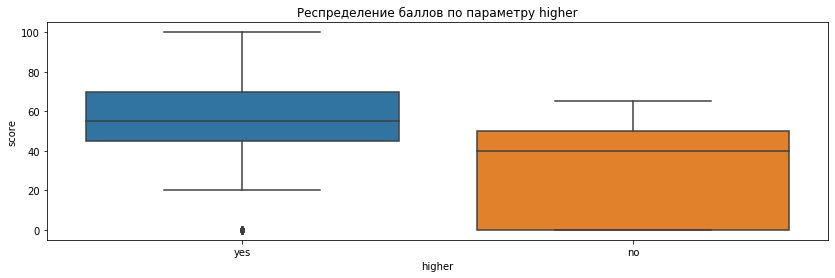

### internet

наличие интернета дома (yes или no)

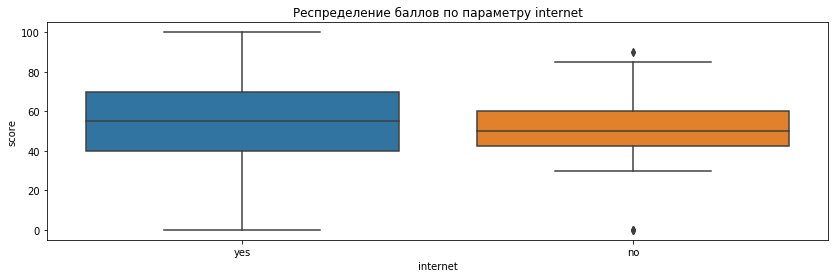

### romantic

в романтических отношениях (yes или no)

**Найдены статистически значимые различия**

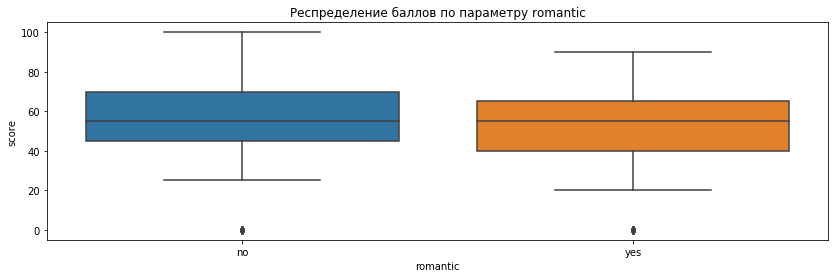

In [34]:
for c in stud_df.columns:
    nom_analysis(stud_df, c)

Посмотрим на список статистически значимых переменных

In [24]:
# Статистически значимые колонки
[c for c in stud_df.columns if np.dtype(
    stud_df[c]) == np.dtype('O') and student_test(stud_df, c)]

['address', 'higher', 'romantic']

Наглядно видно что не все потенциально значимые колонки попали в эту выбоку, поэтому повысим коэфициент значимости и попробуем еще раз

In [49]:
[c for c in stud_df.columns if np.dtype(stud_df[c]) == np.dtype(
    'O') and student_test(stud_df, c, 0.1)]

['sex', 'address', 'Mjob', 'schoolsup', 'paid', 'higher', 'romantic']

Теперь результат выглядит гораздо лучше.

В целях очистки датасета, удалим все остальные номинативные столбцы.

In [51]:
to_remove = [c for c in stud_df.columns if np.dtype(
    stud_df[c]) == np.dtype('O') and not student_test(stud_df, c, 0.1)]
stud_df.drop(to_remove, axis=1, inplace=True)
print("Удалены столбцы", to_remove)

Удалены столбцы ['school', 'famsize', 'Pstatus', 'Fjob', 'reason', 'guardian', 'famsup', 'activities', 'nursery', 'internet']


Посмотрим на итоговый датасет после проведения EDA

In [52]:
stud_df.head(10)

,sex,age,address,Medu,Fedu,Mjob,studytime,failures,schoolsup,paid,higher,romantic,goout,score
0,F,18,U,4.0,4.0,at_home,2.0,0.0,yes,no,yes,no,4.0,30.0
1,F,17,U,1.0,1.0,at_home,2.0,0.0,no,no,yes,no,3.0,30.0
2,F,15,U,1.0,1.0,at_home,2.0,3.0,yes,NaN,yes,NaN,2.0,50.0
3,F,15,U,4.0,2.0,health,3.0,0.0,no,yes,yes,yes,2.0,75.0
4,F,16,U,3.0,3.0,other,2.0,0.0,no,yes,yes,no,2.0,50.0
5,M,16,U,4.0,3.0,services,2.0,0.0,no,yes,yes,no,2.0,75.0
6,M,16,NaN,2.0,2.0,other,2.0,0.0,no,no,yes,no,4.0,55.0
7,F,17,U,4.0,4.0,other,2.0,0.0,yes,no,yes,no,4.0,30.0
8,M,15,U,3.0,2.0,services,2.0,0.0,no,yes,yes,no,2.0,95.0
9,M,15,U,3.0,4.0,other,2.0,0.0,no,yes,yes,no,1.0,75.0


## Выводы

* Данные достаточно чистые, небольшое количество выбросов которые похоже связаны с опечатками. Часть из них удалось поправить
* Почти все колонки содержат пропуски, в допустимом количестве (в пределах 10%)
* Данные показывают что больше всего в обучении мешают проблемы вне учебных заведений, а также юный возраст и активное общение с друзьями. А позитивно на результатах сказывается образование родителей и самостоятельное обучение. 
* Количество прогулов и свободного времени после занятий не оказывает заметного влияния на результаты экзамена
* Местность проживания, сфера в которой работает мать, стремление к образованию и наличие романтических отношений, могут влиять на успеваемость.
* Данные которые предлагается ипользовать для построения модели: **sex, age, address, Medu, Fedu, Mjob, studytime, failures, schoolsup, paid, higher, romantic, goout, score**